# 다양한 변수들간의 관계 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#한글 깨짐 해결
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_2020 = pd.read_excel('2020년이후_1개월단위예측/onion_after2020_combined.xlsx')

In [3]:
#데이터 형태 확인
df_2020

,date_time,상품중품평균가격,자동차용경유,평균풍속(m/s)_통영,일조율(%)_통영,평균풍속(m/s)_울진,일조율(%)_울진,평균풍속(m/s)_여수,일조율(%)_여수,평균기온(℃),...,연단위생산량(톤),month,월단위생산량(kg),소비자물가지수,신선야채지수,생활물가지수,식품생활지수,0.5M 평균 습도(%),50CM 일 토양수분(%),얕은평균토양수분
0,2020-01-01,10462.5,1392.26,2.1,80.8,3.4,92.8,4.4,90.9,-4.0,...,1168227,1,111384.166667,0.090000,0.620000,0.360000,-2.060000,51.0,10.0,17.333333
1,2020-01-02,10500.0,1392.88,1.7,78.8,2.9,92.8,3.5,86.9,-1.7,...,1168227,1,112483.704301,0.092258,0.511613,0.362258,-2.065161,52.0,10.0,17.333333
2,2020-01-03,11025.0,1393.16,1.6,78.8,2.6,91.8,6.3,88.9,-3.5,...,1168227,1,113583.241935,0.094516,0.403226,0.364516,-2.070323,51.0,10.0,16.666667
3,2020-01-04,11325.0,1393.82,1.4,79.8,3.2,85.6,4.8,85.9,-2.0,...,1168227,1,114682.779570,0.096774,0.294839,0.366774,-2.075484,53.0,10.0,16.666667
4,2020-01-05,11625.0,1394.03,1.6,74.7,2.2,87.6,1.7,82.8,-2.4,...,1168227,1,115782.317204,0.099032,0.186452,0.369032,-2.080645,52.0,10.0,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2022-10-28,22340.0,1864.82,2.4,85.3,2.3,0.0,2.9,89.0,10.5,...,1195563,10,56742.133333,9.114194,6.145484,10.872581,13.417097,82.0,15.0,8.666667
1032,2022-10-29,22340.0,1866.42,2.5,75.2,1.8,25.0,4.1,84.4,11.7,...,1195563,10,56915.033333,9.110645,5.611613,10.861935,13.370323,84.0,15.0,8.666667
1033,2022-10-30,22340.0,1867.15,2.2,62.0,1.6,4.7,4.5,90.8,11.9,...,1195563,10,57087.933333,9.107097,5.077742,10.851290,13.323548,83.0,15.0,8.666667
1034,2022-10-31,22340.0,1869.29,3.0,85.2,1.9,68.2,4.3,88.9,11.6,...,1195563,10,57260.833333,9.103548,4.543871,10.840645,13.276774,82.0,15.0,8.666667


# 2020~2023년 사이 데이터 관계 확인

## 온도와 날씨 변수들 간의 산점도 행렬(생산량과의 관계 확인)

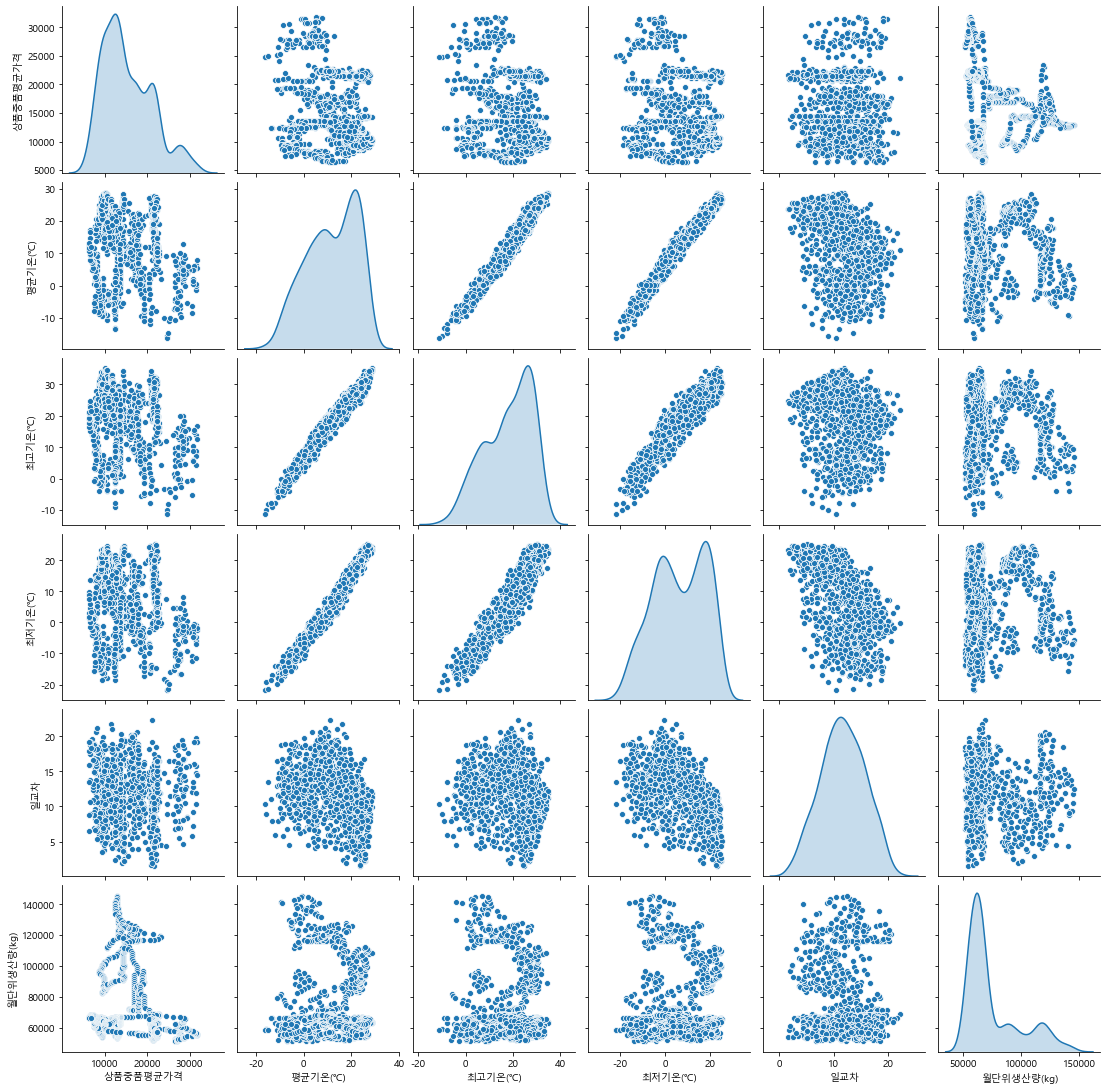

In [5]:
sns.pairplot(data=df_2020, vars=['상품중품평균가격', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '일교차','월단위생산량(kg)'],
             diag_kind='kde')  # 변수들의 분포도도 함께 표시
plt.show()

## 습도와 관련된 변수들 간의 산점도 행렬(생산량과의 관계 확인)


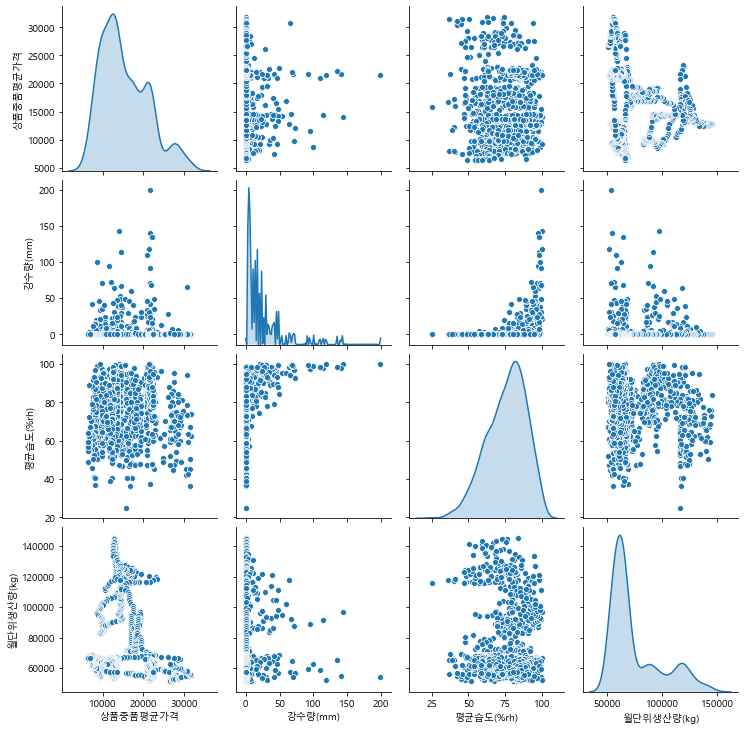

In [7]:
sns.pairplot(data=df_2020, vars=['상품중품평균가격', '강수량(mm)', '평균습도(%rh)', '월단위생산량(kg)'],
             diag_kind='kde')  # 변수들의 분포도도 함께 표시
plt.show()

## 평균기온(℃)과 상품중품평균가격(y) 간의 관계 시각화

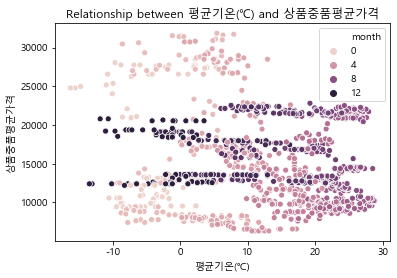

In [8]:
sns.scatterplot(x='평균기온(℃)', y='상품중품평균가격', hue='month', data=df_2020)
plt.title('Relationship between 평균기온(℃) and 상품중품평균가격')
plt.show()

## 소비자물가지수과 상품중품평균가격(y) 간의 관계 시각화

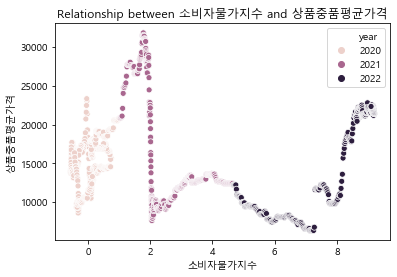

In [9]:
sns.scatterplot(x='소비자물가지수', y='상품중품평균가격', hue='year', data=df_2020)
plt.title('Relationship between 소비자물가지수 and 상품중품평균가격')
plt.show()

## 월별 가격 분포 확인

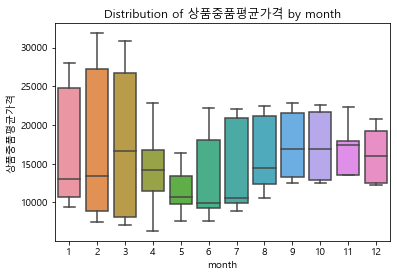

In [10]:
sns.boxplot(x='month', y='상품중품평균가격', data=df_2020[df_2020['month'].between(1, 12)])
plt.title('Distribution of 상품중품평균가격 by month')
plt.show()

# 2013~2023 데이터 관계 확인

In [12]:
df_2013 = pd.read_excel('2013년이후_6개월단위예측/onion_after2013_combined.xlsx')

## 재배 면적 관련 변수들 간의 산점도 행렬

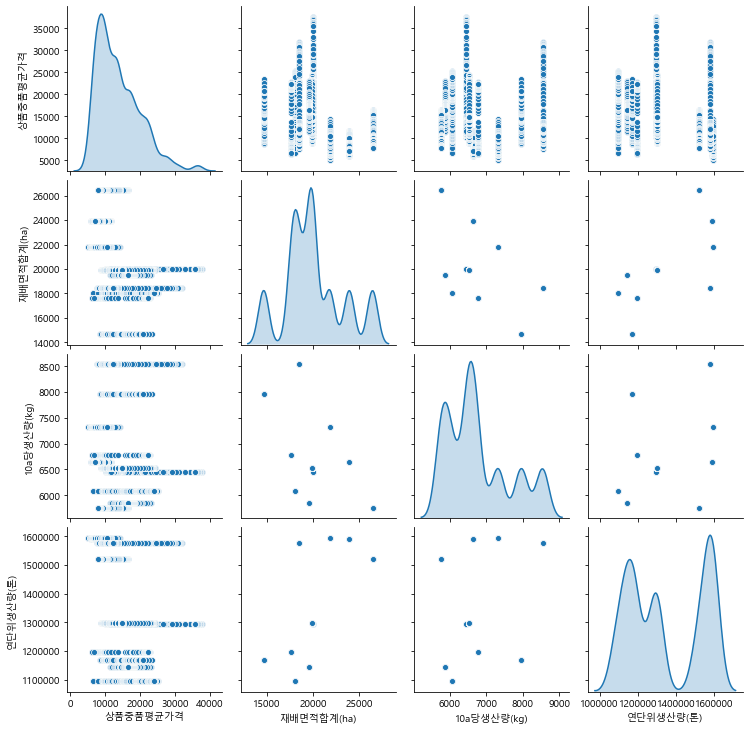

In [14]:
sns.pairplot(data=df_2013, vars=['상품중품평균가격', '재배면적합계(ha)', '10a당생산량(kg)', '연단위생산량(톤)'],
             diag_kind='kde')  # 변수들의 분포도도 함께 표시
plt.show()

## 물가 지수 관련 변수들 간의 산점도 행렬

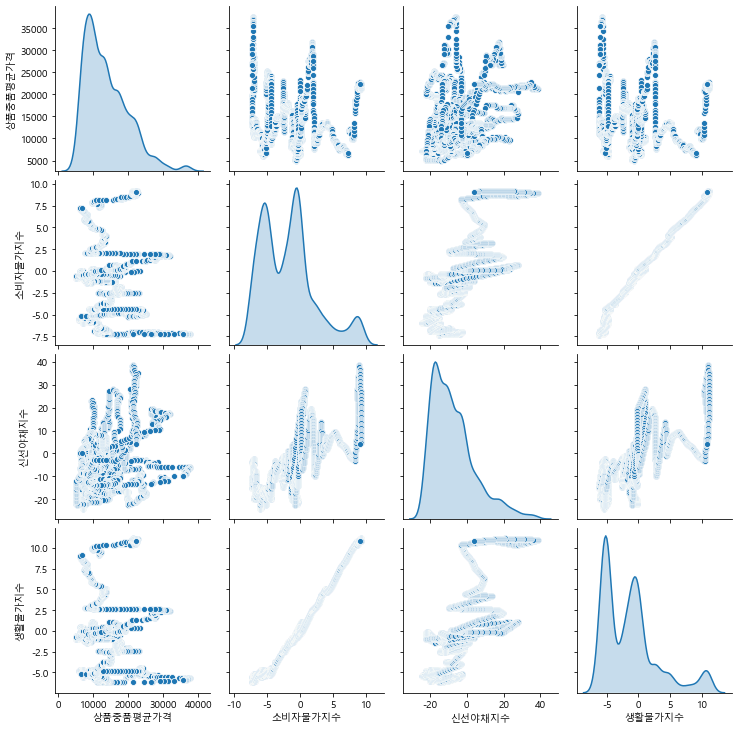

In [15]:
sns.pairplot(data=df_2013, vars=['상품중품평균가격', '소비자물가지수', '신선야채지수', '생활물가지수'],
             diag_kind='kde')  # 변수들의 분포도도 함께 표시
plt.show()

## 평균기온(℃)과 상품중품평균가격(y) 간의 관계 시각화

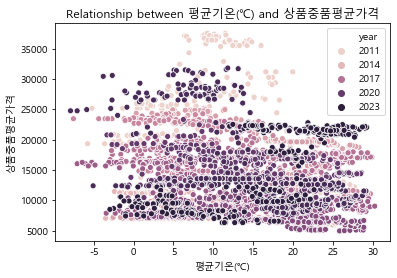

In [16]:
sns.scatterplot(x='평균기온(℃)', y='상품중품평균가격', hue='year', data=df_2013)
plt.title('Relationship between 평균기온(℃) and 상품중품평균가격')
plt.show()

## 연도별 boxplot

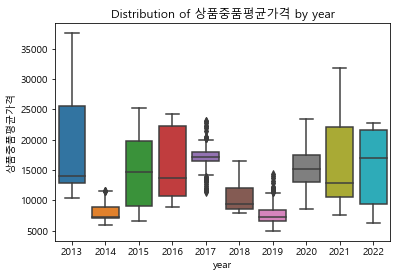

In [17]:
sns.boxplot(x='year', y='상품중품평균가격', data=df_2013)
plt.title('Distribution of 상품중품평균가격 by year')
plt.show()

## 온도와 날씨 변수들 간의 상관 분석 (생산량과의 상관 관계 확인)

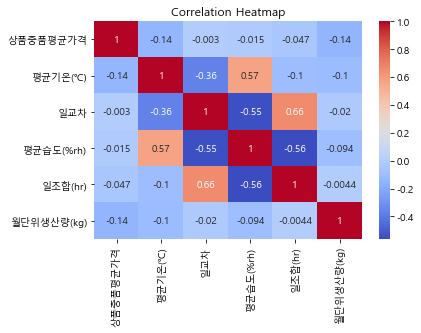

In [20]:
corr = df_2020[['상품중품평균가격', '평균기온(℃)', '일교차', '평균습도(%rh)','일조합(hr)', '월단위생산량(kg)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 다양한 변수들 중 대표적인 변수 선정, 상관 분석

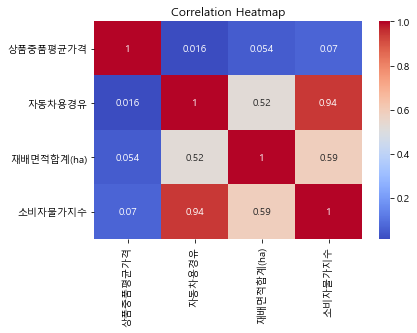

In [21]:
corr = df_2020[['상품중품평균가격',  '자동차용경유', '재배면적합계(ha)', '소비자물가지수']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 온도와 날씨 변수들 간의 상관 분석 (생산량과의 상관 관계 확인)

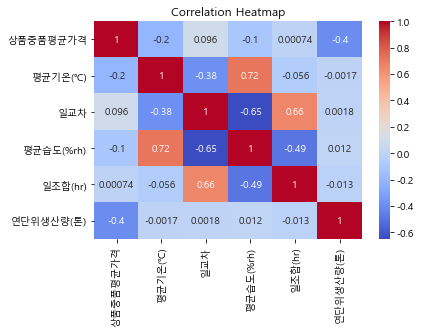

In [25]:
corr = df_2013[['상품중품평균가격', '평균기온(℃)', '일교차', '평균습도(%rh)','일조합(hr)', '연단위생산량(톤)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 다양한 변수들 중 대표적인 변수 선정, 상관 분석

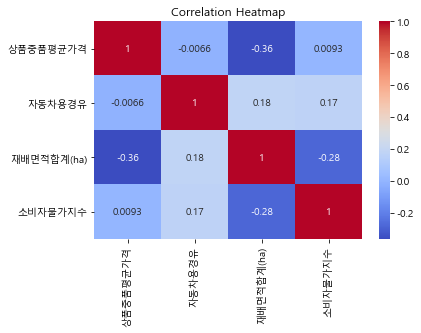

In [24]:
corr = df_2013[['상품중품평균가격',  '자동차용경유', '재배면적합계(ha)', '소비자물가지수']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()